## Linear regression and multiple linear regression with Association of Tennis Professionals data

Provided in *tennis_stats.csv* is data from the men’s professional tennis league, which is called the ATP (Association of Tennis Professionals). Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes.

The ATP men’s tennis dataset includes a wide array of tennis statistics, which are described below:<br> <br>

**Identifying Data**<br>
Player: name of the tennis player<br>
Year: year data was recorded<br> <br>
**Service Game Columns (Offensive)**<br>
Aces: number of serves by the player where the receiver does not touch the ball<br>
DoubleFaults: number of times player missed both first and second serve attempts<br>
FirstServe: % of first-serve attempts made<br>
FirstServePointsWon: % of first-serve attempt points won by the player<br>
SecondServePointsWon: % of second-serve attempt points won by the player<br>
BreakPointsFaced: number of times where the receiver could have won service game of the player<br>
BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance<br>
ServiceGamesPlayed: total number of games where the player served<br>
ServiceGamesWon: total number of games where the player served and won<br>
TotalServicePointsWon: % of points in games where the player served that they won<br> <br>
**Return Game Columns (Defensive)**<br>
FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win<br>
SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win<br>
BreakPointsOpportunities: number of times where the player could have won the service game of the opponent<br>
BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance<br>
ReturnGamesPlayed: total number of games where the player’s opponent served<br>
ReturnGamesWon: total number of games where the player’s opponent served and the player won<br>
ReturnPointsWon: total number of points where the player’s opponent served and the player won<br>
TotalPointsWon: % of points won by the player<br> <br>
**Outcomes**<br>
Wins: number of matches won in a year<br>
Losses: number of matches lost in a year<br>
Winnings: total winnings in USD($) in a year<br>
Ranking: ranking at the end of year<br>

## Import modules and data

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [102]:
tennis = pd.read_csv('tennis_stats.csv')

## Inspect data

In [103]:
tennis.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [104]:
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [105]:
tennis.nunique()

Player                         438
Year                             9
FirstServe                      44
FirstServePointsWon             52
FirstServeReturnPointsWon       44
SecondServePointsWon            55
SecondServeReturnPointsWon      56
Aces                           380
BreakPointsConverted            66
BreakPointsFaced               388
BreakPointsOpportunities       385
BreakPointsSaved                65
DoubleFaults                   221
ReturnGamesPlayed              563
ReturnGamesWon                  46
ReturnPointsWon                 41
ServiceGamesPlayed             572
ServiceGamesWon                 70
TotalPointsWon                  30
TotalServicePointsWon           45
Wins                            48
Losses                          36
Winnings                      1717
Ranking                        435
dtype: int64

In [106]:
tennis.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


## Explore data

Perform exploratory analysis on the data by plotting different features against the different outcomes. What relationships do you find between the features and outcomes? Do any of the features seem to predict the outcomes?

In [107]:
tennis_numeric = tennis.select_dtypes(include=['float64', 'int64'])

In [108]:
corr = tennis_numeric.corr()

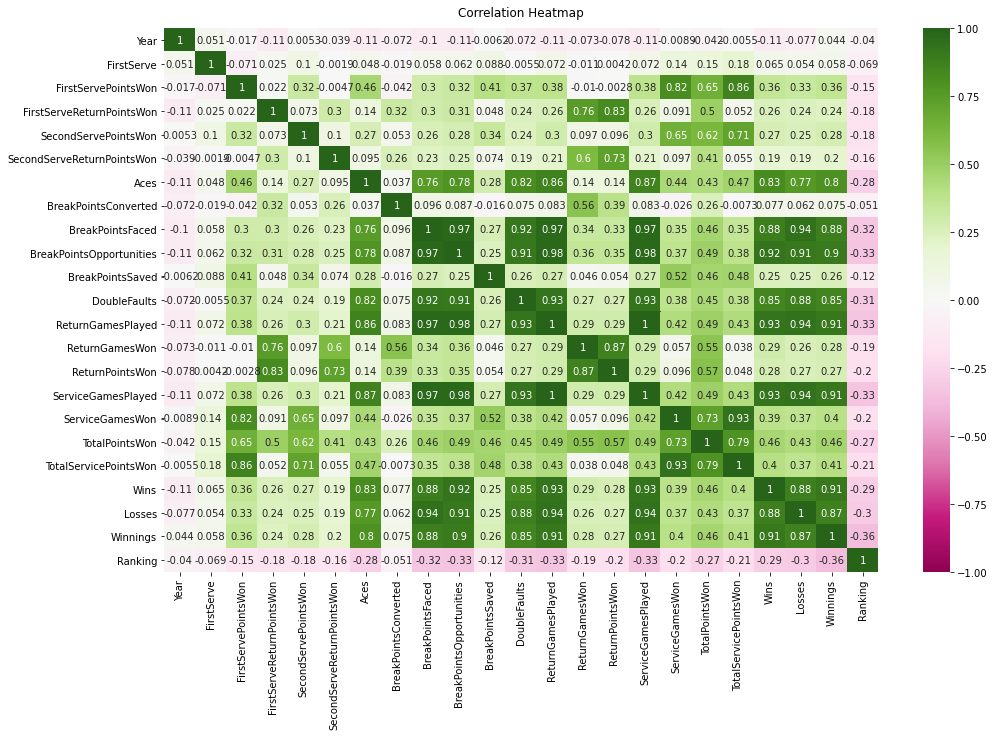

In [109]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1,cmap="PiYG", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [132]:
# function adapted from from stackoverflow: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

def get_redundant_pairs(tennis_numeric):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = tennis_numeric.columns
    for i in range(0, tennis_numeric.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_correlations(df):
    au_corr = tennis_numeric.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

correlations = get_correlations(tennis_numeric)
correlations.to_csv('correlations.csv')

#### Strong Absolute Correlations ( > 0.70)
- *47 pairwise correlations are above 0.70* <br>
- *The highest correlations are among proxies for number of games played - those who play more games (return games and service games are more likely to have  more wins, losses, winnings, aces, breakpoints faced, breakpoint opportunities, and double faults.*<br>

#### Moderate Strong Absolute Correlations ( 0.70 > 0.50)
- *8 pairwise correlations are between 0.70 and 0.35*<br>
- *Many of the moderate strong correlations are among the overall number of points, and number of points won during various elements of the game (first serve points one, second serve points won, total points won) OR the number of points won during service/return games and service/return game wins.*<br>

#### Moderate Weak Absolute Correlations ( 0.50 > 0.30)
- *58 pairwise correlations are between 0.50 and 0.30*<br>
- *Proxies for games played (return games played, service games played) have moderate-weak correlations with total points won, total service points and service games one.*<br>
- *Service games won, total points won, and total service points won have moderate-weak correlation with wins, losses, and winnings.*<br>

####  Weak Absolute Correlations ( 0.30 > 0)
- *141 pairwise correlations are below 0.30*<br>

#### Negative Correlations
- *Year has weak negative correlations with all other metrics; Year should be considered a categorical variable and excluded from this analysis.* <br>
- *Ranking has negative correlations with all other metrics, indicating that the metrics in this dataset are not necessarily the metrics that are used to calculate rankings.*<br>

## Linear Regression Model

Use one feature from the dataset to build a single feature linear regression model on the data. Your model, at this point, should use only one feature and predict one of the outcome columns. Before training the model, split your data into training and test datasets so that you can evaluate your model on the test set. How does your model perform? Plot your model’s predictions on the test set against the actual outcome variable to visualize the performance.

### Split dataset into training and test set

In [111]:
# independent variable
x = tennis[['BreakPointsConverted']]

# depedent variable
y = tennis[['ReturnGamesWon']]

In [112]:
# split data into 80% training set and 20% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [113]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1376, 1)
(345, 1)
(1376, 1)
(345, 1)


### Create Linear Regression Model

In [114]:
# reshape X
x = x.values.reshape(-1, 1)

In [120]:
# create linear regression model
regr = linear_model.LinearRegression()

# fit model
regr.fit(x,y)

# predict y values
y_predict = regr.predict(x)

### Visualize results

Text(0.5, 1.0, 'Break Points Converted v. Return Games Won')

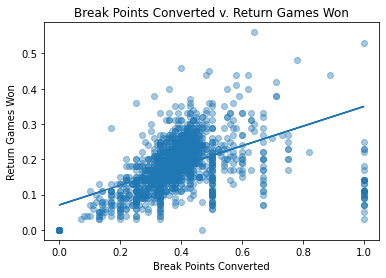

In [126]:
plt.clf()
plt.scatter(x,y,alpha=0.4)
plt.plot(x, y_predict)
plt.xlabel("Break Points Converted")
plt.ylabel("Return Games Won")
plt.title("Break Points Converted v. Return Games Won")

Text(0.5, 1.0, 'Return Games Won - actual v. predicted')

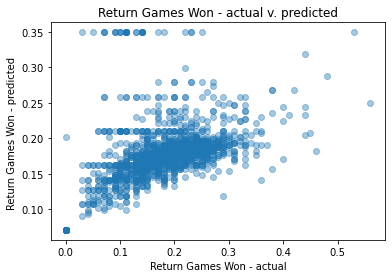

In [128]:
plt.clf()
plt.scatter(y,y_predict,alpha=0.4)
plt.xlabel("Return Games Won - actual")
plt.ylabel("Return Games Won - predicted ")
plt.title("Return Games Won - actual v. predicted")

### Evaluate accuracy of model

In [130]:
# find the mean squared error regression loss for the training test
regr.score(x_train, y_train)

0.32137407125647743

In [131]:
# find the mean squared error regression loss for the testing test
regr.score(x_test, y_test)

0.2901615036073353

Create a few more linear regression models that use one feature to predict one of the outcomes. Which model that you create is the best?

Create a few linear regression models that use two features to predict yearly earnings. Which set of two features results in the best model?

Create a few linear regression models that use multiple features to predict yearly earnings. Which set of features results in the best model?

Head to the Codecademy forums and share your set of features that resulted in the highest test score for predicting your outcome. What features are most important for being a successful tennis player?

- Wins / Losses / 0.878732 <br>
     - *Number of wins correlate with number of losses, indicating that those who play more games have more wins and more losses* <br><br>

- Wins / Winnings / 0.913297 <br>
- Losses / Winnings / 0.869277 <br>
    - *Both wins and losses, as well as service and return games played, correlate with winnings, indicating that those who play more games are more likely to have more wins and more losses, and are more likely to earn money through wins* <br><br>

- ReturnGamesPlayed / ServiceGamesPlayed / 0.999842 <br>
- ReturnGamesPlayed / Losses / 0.936755 <br>
- ServiceGamesPlayed / Losses / 0.935182 <br>
- ServiceGamesPlayed / Wins / 0.929153 <br>
- ReturnGamesPlayed / Wins / 0.928408 <br>
- ServiceGamesPlayed / Winnings / 0.912985 <br>
- ReturnGamesPlayed / Winnings / 0.912613 <br>
    - *Players alternate between return and service games during a match; a nearly perfect correlation between these metrics is expected*<br>
    - *Number of games played correlated with both wins and losses, as well winnings* <br><br>

- BreakPointsOpportunities / ReturnGamesPlayed / 0.978824 <br>
- BreakPointsOpportunities / ServiceGamesPlayed / 0.978278 <br>
- BreakPointsOpportunities / Wins / 0.923453 <br>
- BreakPointsOpportunities / Losses / 0.909295 <br>
- BreakPointsOpportunities / Winnings / 0.900444 <br>
- BreakPointsOpportunities / DoubleFaults / 0.906391 <br>
     - *Break point opportunities correlates with proxies for number of games played* <br><br>

- BreakPointsFaced / BreakPointsOpportunities / 0.973352 <br>
- BreakPointsFaced / ReturnGamesPlayed / 0.972449 <br>
- BreakPointsFaced / ServiceGamesPlayed / 0.971296 <br>
- BreakPointsFaced / Losses / 0.943309 <br>
- BreakPointsFaced / Wins / 0.883470 <br>
- BreakPointsFaced / Winnings / 0.876036 <br>
- BreakPointsFaced / DoubleFaults / 0.917645 <br>
     - *Break points faced correlates games played, as expected* <br>
     - *Break points faced also correlates with other proxies for number of games played* <br><br>

- Aces / ServiceGamesPlayed / 0.866138 <br>
- Aces / ReturnGamesPlayed / 0.863648 <br>
- Aces / BreakPointsFaced / 0.757405
- Aces / BreakPointsOpportunities / 0.784934
- Aces / Winnings / 0.798404
- Aces / Wins / 0.825301
- Aces / Losses /  0.768628
- Aces / DoubleFaults / 0.819031
     - *Number of aces correlates with number of games played* <br><br>

- ServiceGamesWon / TotalServicePointsWon / 0.934764 <br>
- ReturnGamesWon / ReturnPointsWon / 0.872216 <br>
    - *Winning service points and winning return points are correlated with winning service and return games, respectively* <br><br>
  
- DoubleFaults / ServiceGamesPlayed / 0.925879 <br>
- DoubleFaults / ReturnGamesPlayed / 0.925763 <br>
- DoubleFaults/ Wins / 0.847459 <br>
- DoubleFaults / Losses / 0.881922 <br>
- DoubleFaults / Winnings / 0.854685 <br>
    - *Double faults are correlated with number of games played and proxies for number of games played* <br><br>

- FirstServePointsWon / TotalServicePointsWon / 0.860033 <br>
- TotalPointsWon / TotalServicePointsWon / 0.791356 <br>
- FirstServeReturnPointsWon / ReturnGamesWon / 0.757435 <br>
- SecondServeReturnPointsWon / ReturnPointsWon / 0.727338 <br>
- ServiceGamesWon / TotalPointsWon / 0.727091 <br>
- SecondServePointsWon / TotalServicePointsWon / 0.713076 <br>